In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import svm

In [3]:
from sklearn.metrics import accuracy_score

In [4]:
#data collection and processing
df=pd.read_csv("loan_data.csv")
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df.shape

(614, 13)

In [10]:
cat_col=df.select_dtypes(include=['object','category']).columns
#for numerical 'number'

In [11]:
cat_col

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
for col in cat_col:
    mode_val=df[col].mode()[0]
    df[col].fillna(mode_val,inplace=True)

In [13]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [15]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
df=df.dropna()

In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [19]:
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

C:\Users\deend\AppData\Local\Temp\ipykernel_14588\1386201457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Loan_Status']=le.fit_transform(df['Loan_Status'])


In [20]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [21]:
df['Dependents'].value_counts()

Dependents
0     319
2      95
1      89
3+     47
Name: count, dtype: int64

In [23]:
df=df.replace(to_replace='3+',value=4)

<Axes: xlabel='Education', ylabel='count'>

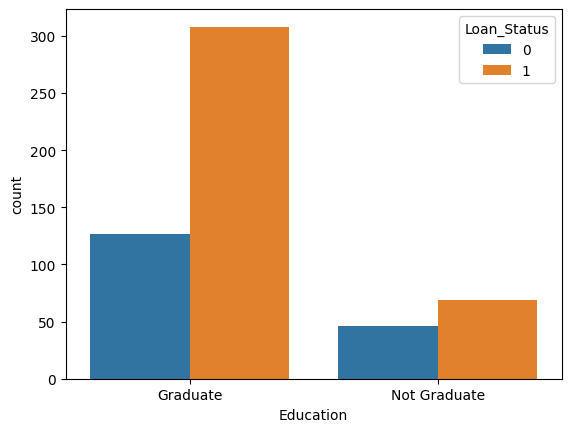

In [24]:
#data visualisation
sns.countplot(x='Education',hue='Loan_Status',data=df)

<Axes: xlabel='Married', ylabel='count'>

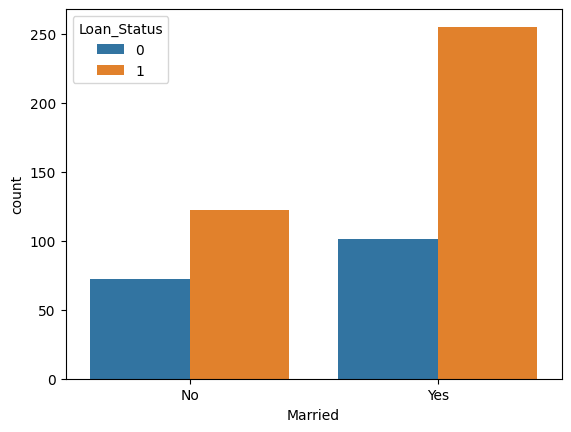

In [25]:
sns.countplot(x='Married',hue='Loan_Status',data=df)

In [31]:
cat_col=df.select_dtypes(include=['object','category']).columns

In [32]:
cat_col

Index(['Dependents', 'Education', 'Self_Employed', 'Property_Area'], dtype='object')

In [35]:
from sklearn.preprocessing import LabelEncoder

for col in cat_col:
    if col != 'Loan_Status':
        le = LabelEncoder()
        df[col] = df[col].astype(str)  
        df[col] = le.fit_transform(df[col])


In [36]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [38]:
X=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=df['Loan_Status']

In [39]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [41]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)#stratify ensures 0 and 1 split equally in train and test

In [42]:
print(X.shape,X_train.shape,X_test.shape)

(550, 11) (495, 11) (55, 11)


In [43]:
classifier=svm.SVC(kernel='linear')

In [44]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [45]:
y_train_pred=classifier.predict(X_train)
train_accuracy=accuracy_score(y_train_pred,Y_train)

In [46]:
y_test_pred=classifier.predict(X_test)
test_accuracy=accuracy_score(y_test_pred,Y_test)

In [48]:
print("Train data accuracy :",train_accuracy*100)
print("Test data accuracy :",test_accuracy*100)

Train data accuracy : 78.3838383838384
Test data accuracy : 81.81818181818183
